# Introduction to the Bak, Tang, Wiesenfeld Model of Self-Organized Criticality

The Bak, Tang, Wiesenfeld (BTW) model is a pioneering framework in the study of self-organized criticality (SOC).

### Self-Organized Criticality (SOC)
Self-organized criticality is a property of dynamical systems that naturally evolve to a critical state, where a small perturbation can trigger a chain reaction of events. These systems do not require fine-tuning of parameters to reach the critical state, which emerges naturally through the system's dynamics.

### The Sandpile Model
The BTW model is commonly illustrated using the sandpile model, which is a cellular automaton used to simulate the behavior of SOC. In this model, sand grains are added one by one to a grid. When the number of grains at any site exceeds a critical threshold (4), the site topples, distributing grains to neighboring sites. This can cause a cascading effect, where multiple sites topple in an avalanche.

### Dynamics of the Model
1. **Adding Grains**: Grains of sand are added to random sites on the grid.
2. **Toppling**: When the number of grains at a site exceeds a critical value (4 in this simulation), the site topples, sending grains to adjacent sites.
3. **Avalanches**: This redistribution can cause adjacent sites to exceed their thresholds, leading to further toppling in a cascading effect, known as an avalanche.
4. **Reaching Criticality**: Over time, the system self-organizes into a critical state where the distribution of avalanche sizes follows a power-law.


## References
* [Self-organized criticality: An explanation of the 1/f noise](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.59.381)
* [How Nature Works](https://link.springer.com/book/10.1007/978-1-4757-5426-1)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, to_rgb
from tqdm import tqdm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
def create_colormap(hex_color1, hex_color2, reverse=False):
    """
    Create a linearly interpolated colormap from two hex colors.

    :param hex_color1: String, the first hex color (e.g., "#FF0000" for red)
    :param hex_color2: String, the second hex color (e.g., "#0000FF" for blue)
    :return: LinearSegmentedColormap
    """
    color1 = to_rgb(hex_color1)
    color2 = to_rgb(hex_color2)
    if reverse:
        colors = [color2, color1]
    else:
        colors = [color1, color2]
    cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)

    return cmap

In [7]:
sheet_map = create_colormap("#f4f0e8", "#383b3e")

In [8]:
class AbelianSandpile:
    """
    Implements the Bak–Tang–Wiesenfeld model of the Abelian sandpile.

    Attributes:
    n (int): The size of the grid (excluding the boundary).
    grid (numpy.ndarray): The grid representing the sandpile.
    history (list of numpy.ndarray): A history of grid states after each step.
    history_toppling (list of numpy.ndarray): A history of toppling events.

    Methods:
    step(): Performs a single step in the sandpile model.
    step_and_record(): Performs a single step and records the toppling events.
    check_difference(grid1, grid2): Checks the difference between two grids.
    simulate(n_step): Simulates the sandpile for a given number of steps.
    simulate_and_record(n_step): Simulates the sandpile for a given number of steps and records the toppling events.
    """
    def __init__(self, n=100, random_state=None):
        """
        Initializes the AbelianSandpile class.

        Parameters:
        n (int): The size of the grid (excluding the boundary). Default is 100.
        random_state (int): The seed for the random number generator. Default is None.
        """
        self.n = n
        np.random.seed(random_state) # Set the random seed
        self.grid = np.random.choice([0, 1, 2, 3], size=(n + 2, n + 2)).astype(np.int8)
        self.grid[0, :] = 0
        self.grid[-1, :] = 0
        self.grid[:, 0] = 0
        self.grid[:, -1] = 0
        self.history =[self.grid.copy()]
        self.history_toppling =[np.zeros_like(self.grid, dtype=np.int8)]


    def step(self):
        """
        Performs a single step in the sandpile model. This involves adding a grain
        of sand to a random position and then performing the toppling relaxation
        process if any cell has 4 or more grains.
        """
        self.grid[np.random.randint(1, self.n+1), np.random.randint(1, self.n+1)] += 1 #dropping a grain
        #topplig relaxation
        while(np.max(self.grid) >= 4):
            toppling = self.grid >= 4
            self.grid[toppling] -= 4
            self.grid[:-1, :][toppling[1:, :]] +=1
            self.grid[1:, :][toppling[:-1, :]] +=1
            self.grid[:, :-1][toppling[:, 1:]] +=1
            self.grid[:, 1:][toppling[:, :-1]] +=1
            self.grid[0, :] = 0
            self.grid[-1, :] = 0
            self.grid[:, 0] = 0
            self.grid[:, -1] = 0

    def step_and_record(self):
        """
        Performs a single step in the sandpile model and records the toppling events.
        """
        self.grid[np.random.randint(1, self.n+1), np.random.randint(1, self.n+1)] += 1 #dropping a grain
        while(np.max(self.grid) >= 4):
            toppling = self.grid >= 4
            self.grid[toppling] -= 4
            self.grid[:-1, :][toppling[1:, :]] +=1
            self.grid[1:, :][toppling[:-1, :]] +=1
            self.grid[:, :-1][toppling[:, 1:]] +=1
            self.grid[:, 1:][toppling[:, :-1]] +=1
            self.grid[0, :] = 0
            self.grid[-1, :] = 0
            self.grid[:, 0] = 0
            self.grid[:, -1] = 0
            self.history.append(self.grid.copy())
            self.history_toppling.append(toppling.astype(np.int8))

    @staticmethod
    def check_difference(grid1, grid2):
        """
        Checks the difference between two grids.

        Parameters:
        grid1 (numpy.ndarray): The first grid to compare.
        grid2 (numpy.ndarray): The second grid to compare.

        Returns:
        int: The number of differing elements between the two grids.
        """
        return np.sum(grid1 != grid2)

    
    def simulate(self, n_step):
        """
        Simulates the sandpile for a given number of steps.

        Parameters:
        n_step (int): The number of steps to simulate.
        """
        for _ in tqdm(range(n_step)):
            self.step()

    def simulate_and_record(self, n_step):
        """
        Simulates the sandpile for a given number of steps and records the toppling events.

        Parameters:
        n_step (int): The number of steps to simulate.
        """
        for _ in tqdm(range(n_step)):
            self.step_and_record()


In [9]:
model = AbelianSandpile(n=200, random_state=12345)
model.simulate(30000)

100%|███████████████████████████████████| 30000/30000 [00:24<00:00, 1206.96it/s]


In [10]:
model.simulate_and_record(50)

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 216.15it/s]


In [11]:
hist_toppling = np.array(model.history_toppling)
hist_toppling_cum = np.cumsum(hist_toppling, axis=0)
toppled_sites = np.count_nonzero(hist_toppling, axis=(1,2))
print(f"N° of frames: {len(model.history_toppling)}")

N° of frames: 2755


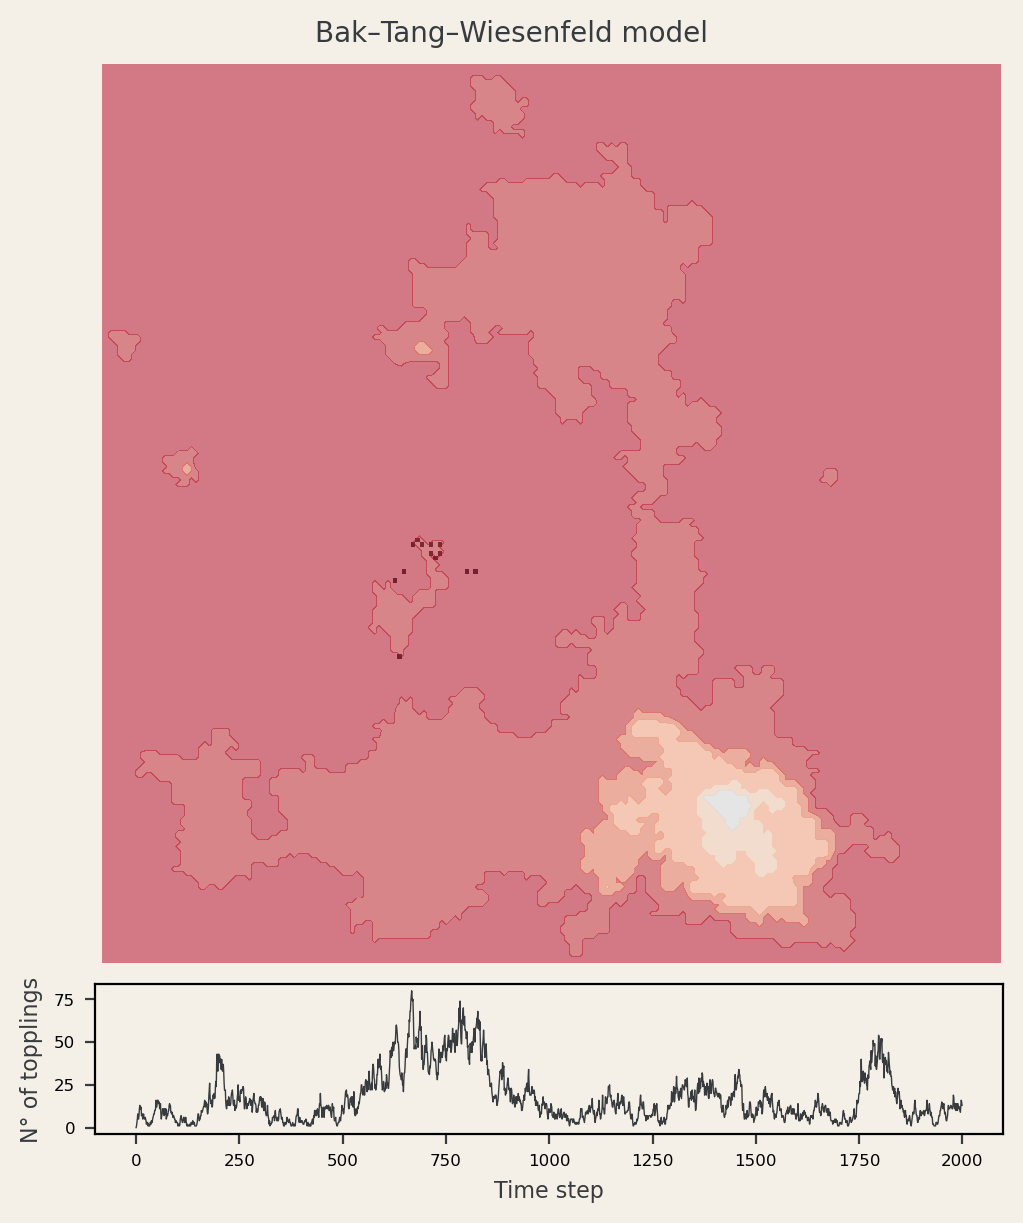

In [12]:
%matplotlib inline
index = 2000
fig, axs = plt.subplot_mosaic("""
    AAA
    AAA
    AAA
    BBB
    """, figsize=(5,6),layout="constrained", height_ratios=[1, 1, 1, 0.5])
fig.set_facecolor("#f4f0e8")
axs["A"].contourf(hist_toppling_cum[index], vmin=2, vmax=14, origin="lower", cmap="coolwarm_r", alpha=0.5) #RdYlBu
axs["A"].imshow(hist_toppling[index],cmap=sheet_map, origin="lower")#, interpolation="bicubic")
axs["A"].axis("off")
axs["B"].set_facecolor("#f4f0e8")
axs["B"].plot(toppled_sites[:index], color="#383b3e", linewidth=0.5)
axs["B"].set_xlabel("Time step", color="#383b3e", fontsize=8)
axs["B"].set_ylabel("N° of topplings", color="#383b3e", fontsize=8)
axs["B"].tick_params(axis='both', labelsize=6, color="#383b3e")
fig.suptitle("Bak–Tang–Wiesenfeld model", fontsize=10, color = "#383b3e")
plt.show()